<a href="https://colab.research.google.com/github/SolbiChoi/test_deeplearning/blob/master/mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.datasets.mnist import load_data

In [4]:
(x_train, y_train), (x_test, y_test) = load_data(path='mnist.npz')
x_train.shape, y_train.shape, x_test.shape, y_test.shape  # (행, 열, 밀어넣는..3차원)

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [7]:
# y_train[4], x_train[4]
y_train[50000], x_train[50000]

(3, array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  47, 160, 195,
         205,  71,  86,  13,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,  12, 238, 254, 254,
         254, 254, 254, 227,  84,   0,   0,   0,   0,   0,   0,   0,   0,
         

3


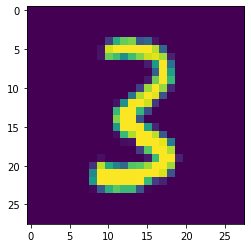

In [11]:
import matplotlib.pyplot as plt
plt.imshow(x_train[50000])
print(y_train[50000])

In [12]:
x_train = x_train.reshape(-1,28*28)
x_train.shape

(60000, 784)

In [13]:
x_test = x_test.reshape(-1,28*28)
x_test.shape

(10000, 784)

In [14]:
y_train.shape

(60000,)

In [15]:
y_train[2:10]

array([4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [18]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

## Apply model

In [16]:
import tensorflow as tf

In [22]:
model = tf.keras.models.Sequential()

model.add(tf.keras.Input(shape=(784,))) # input layer - reshape후 열의 숫자 입력
model.add(tf.keras.layers.Dense(64, activation='relu')) # hidden layer
model.add(tf.keras.layers.Dense(64, activation='relu')) # hidden layer
# 분류 3개 이상일 때 -> softmax, binary -> sigmoid (hidden에서만 사용)
model.add(tf.keras.layers.Dense(10, activation='softmax')) # output layer

# regression -> loss : mse
# binary classification -> loss : binary crossentropy
# over 3 classification -> loss : categorical cross entropy (sparse_categorical_crossentropy)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
hist = model.fit(x_train, y_train, epochs=100, validation_split=0.3)

## evaluation

In [25]:
hist.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

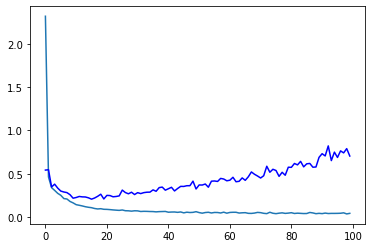

In [29]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'],'b-')
plt.show()

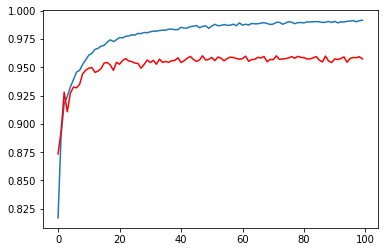

In [31]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'],'-r')
plt.show()

## service

In [33]:
y_test[30]

3

In [34]:
model.predict([x_test[30,:]])

ValueError: ignored